# Lab 1: Strands Agents Basics (10 minutes)

## Learning Objectives - AWS Workshop

**You'll Learn These Core Strands Patterns:**
- ✅ Create your first Strands agent: `Agent(model=BedrockModel(...))`
- ✅ Build custom tools: `@tool def my_function()`
- ✅ Make agents use tools automatically
- ✅ Create reusable visualization tools

**What You'll Build:**
- Personal finance agent that calculates budgets and creates charts
- Reusable visualization tool for all labs
- Foundation data for progressive learning

## Prerequisites
- AWS credentials configured for Bedrock access
- Basic Python knowledge

## Step 1: Install and Import Strands

**Core Strands Pattern**: Import and configure

In [34]:
# Install Strands using pip

!pip install -q strands-agents strands-agents-tools matplotlib

In [35]:
from strands import Agent, tool
from strands.models import BedrockModel

# Supporting libraries for our financial agent
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("🚀 Strands Agents SDK imported successfully!")
print("📊 AWS Workshop: Ready to build your first agent!")

🚀 Strands Agents SDK imported successfully!
📊 AWS Workshop: Ready to build your first agent!


In [36]:
model = BedrockModel(
    model_id="us.anthropic.claude-3-7-sonnet-20250219-v1:0"
    # This connects to your AWS Bedrock service
)

print("✅ AWS Bedrock model configured for Strands!")
print("🎯 Ready to create your first agent")

✅ AWS Bedrock model configured for Strands!
🎯 Ready to create your first agent


## Step 2: Create Your First Strands Agent

**Core Strands Pattern**: `Agent(model=model)`

In [37]:
basic_agent = Agent(model=model)

# Test your first Strands agent
response = basic_agent("What is the 50/30/20 budgeting rule?")

# The 50/30/20 Budgeting Rule

The 50/30/20 rule is a simple budgeting framework that divides your after-tax income into three spending categories:

- **50%** for needs (essential expenses)
- **30%** for wants (discretionary spending)
- **20%** for savings and debt repayment

## Category Breakdown:

**Needs (50%)** include:
- Housing (rent/mortgage)
- Groceries
- Utilities
- Insurance
- Minimum debt payments
- Transportation

**Wants (30%)** include:
- Dining out
- Entertainment
- Shopping
- Travel
- Subscriptions

**Savings/Debt (20%)** include:
- Emergency fund
- Retirement accounts
- Other savings goals
- Extra debt payments beyond minimums

This rule provides a straightforward starting point for budgeting, though you may need to adjust the percentages based on your specific financial situation and goals.

## Step 3: Add System Prompt for Specialization

**Core Strands Pattern**: `Agent(model=model, system_prompt="...")`

The system prompt acts as a guiding framework to the LLM for interpreting user queries, structuring responses and helps the agent to maintain a consistent tone and style.

In [38]:
financial_agent = Agent(
    model=model,
    system_prompt= """ You are a helpful personal finance assistant. You provide general strategies 
    to creating budgets, tips on finacial discipline to acheive financial milestones and analyse
    financial trends. You do not provide any investment advice.
    
    Keep responses concise and actionable.
    Always provide 2-3 specific steps the user can take.
    Focus on practical budgeting and spending advice.
    """
)

# Test the specialized agent
print("💰 Specialized Financial Agent Response:")
response = financial_agent("I spend $800/month on dining out. Is this too much for someone making $5000/month?")

💰 Specialized Financial Agent Response:
Based on your monthly income of $5,000, spending $800 on dining out represents 16% of your income, which is on the high side for a typical budget.

Most financial experts recommend limiting food expenses (including groceries and dining out) to 10-15% of your income, with dining out being only a portion of that.

Here are specific steps you can consider:

1. Try reducing dining out to $500-600/month (10-12% of income) by replacing 1-2 restaurant meals each week with home-cooked alternatives.

2. Track your dining expenses for two weeks to identify patterns - are there specific days or situations when you're more likely to eat out? This awareness can help you plan better.

3. Set up a dedicated "dining out" budget category in your banking app or use cash specifically for restaurants to make the spending more tangible.

Would you like suggestions for balancing enjoyment of restaurants while reducing this expense?

## Step 4: Create Custom Tools

**Core Strands Pattern**: `@tool` decorator for custom functions

In [39]:
@tool
def calculate_budget(monthly_income: float) -> str:
    """Calculate 50/30/20 budget breakdown."""
    needs = monthly_income * 0.50
    wants = monthly_income * 0.30  
    savings = monthly_income * 0.20
    return f"💰 Budget for ${monthly_income:,.0f}/month:\n• Needs: ${needs:,.0f} (50%)\n• Wants: ${wants:,.0f} (30%)\n• Savings: ${savings:,.0f} (20%)"

@tool
def create_financial_chart(data_dict: dict, chart_title: str = "Financial Chart") -> str:
    """Universal chart creator - reusable across all labs!"""
    if not data_dict:
        return "❌ No data provided for chart"
    
    # Create pie chart
    labels = list(data_dict.keys())
    values = list(data_dict.values())
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']
    
    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors[:len(values)], startangle=90)
    plt.title(f'📊 {chart_title}', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    return f"✅ {chart_title} visualization created!"

@tool
def generate_sample_data() -> str:
    """Generate sample financial data."""
    # Create sample spending data
    spending_data = {
        'Groceries': 400,
        'Dining': 300, 
        'Transportation': 200,
        'Entertainment': 150,
        'Utilities': 250,
        'Shopping': 200
    }
    
    # Save for other labs to use
    global sample_spending_data
    sample_spending_data = spending_data
    
    # Create user profile
    user_profile = {
        "monthly_income": 5000,
        "budget_goal": 1000,
        "focus_areas": ["dining", "shopping"],
        "created_date": datetime.now().isoformat()
    }
    
    with open('user_profile.json', 'w') as f:
        json.dump(user_profile, f, indent=2)
    
    total_spending = sum(spending_data.values())
    return f"✅ Sample data created! Total monthly spending: ${total_spending:,}"

print("🛠️ Custom Strands tools created!")
print("🎯 Key Pattern: @tool decorator makes any function available to agents")

🛠️ Custom Strands tools created!
🎯 Key Pattern: @tool decorator makes any function available to agents


## Step 5: Create Agent with Tools

**Core Strands Pattern**: `Agent(model=model, tools=[tool1, tool2], system_prompt="...")`

In [40]:
budget_agent = Agent(
    model=model,
    tools=[calculate_budget, create_financial_chart, generate_sample_data],
    system_prompt="""You are a budget analysis agent.

    Your capabilities:
    - Calculate 50/30/20 budgets using calculate_budget tool
    - Create visual charts using create_financial_chart tool  
    - Generate sample data using generate_sample_data tool

    Always be concise and use tools when appropriate.
    Provide visual output whenever possible.
    """
)

print("🎯 Budget Agent with Tools Ready!")
print("✨ This agent can automatically choose which tools to use!")

🎯 Budget Agent with Tools Ready!
✨ This agent can automatically choose which tools to use!


## Step 6: Test Your Strands Agent with Tools

Watch your agent automatically choose and use tools!

🧪 Testing: Agent automatically chooses tools based on request
🤖 Agent Response - Budget Request:
I'd be happy to create a budget breakdown for your $6000 monthly income using the 50/30/20 rule. Let me calculate that for you and create a visual representation.
Tool #1: calculate_budget
Now let me create a chart to visualize this budget breakdown:
Tool #2: create_financial_chart


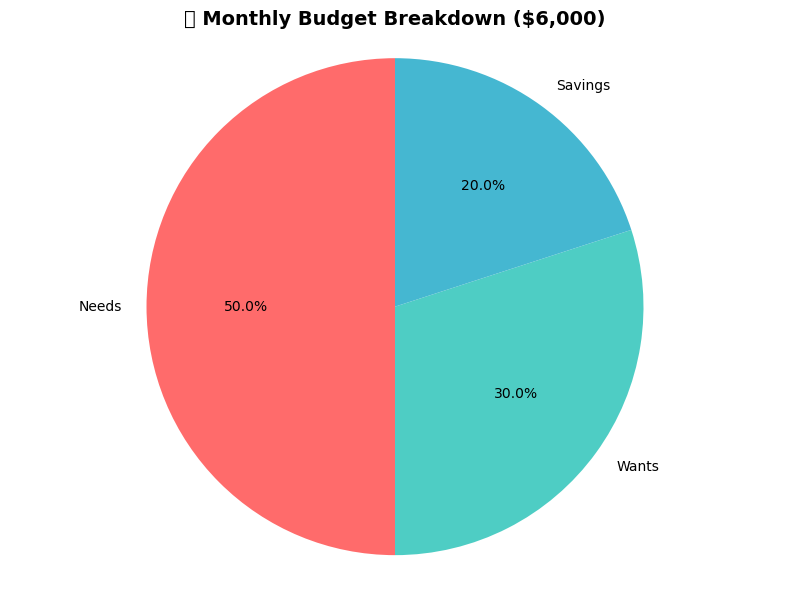

## Your 50/30/20 Budget Breakdown

Based on your monthly income of $6,000:

- **Needs (50%)**: $3,000
  *Essentials like rent/mortgage, utilities, groceries, minimum debt payments, insurance, etc.*

- **Wants (30%)**: $1,800
  *Non-essentials like dining out, entertainment, hobbies, subscriptions, etc.*

- **Savings (20%)**: $1,200
  *Emergency fund, retirement accounts, investments, additional debt payments, etc.*

This is a general guideline that you can adjust based on your specific financial goals and circumstances. Would you like any specific advice on any of these categories?

In [41]:
# Step 7: Test Autonomous Tool Selection
print("🧪 Testing: Agent automatically chooses tools based on request")
print("="*60)

# Test 1: Budget calculation
print("🤖 Agent Response - Budget Request:")
response1 = budget_agent("I make $6000 per month. Can you create a budget breakdown for me?")

# Test 2: Data generation + visualization
response2 = budget_agent("Create some sample spending data and show me a visual breakdown")
print("🤖 Agent Response - Data + Visualization Request:")
print(response2)


🤖 Agent Response - Chart Request:
I'll create a pie chart showing your budget breakdown by category based on the 50/30/20 rule we calculated for your $6,000 monthly income.
Tool #3: create_financial_chart


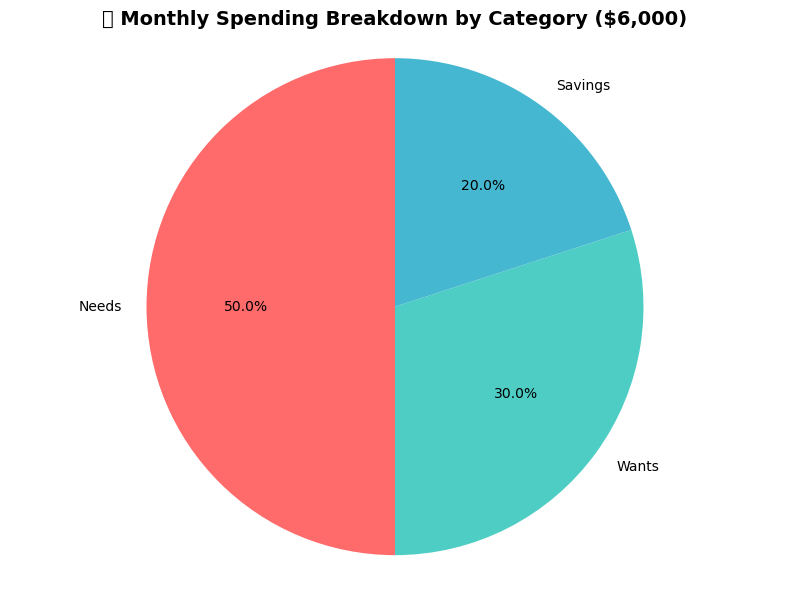

Here's your pie chart showing how your $6,000 monthly income is allocated across the three main budget categories:

- **Needs (50%)**: $3,000 - The largest portion covers essentials like housing, utilities, groceries, transportation, insurance, and minimum debt payments.

- **Wants (30%)**: $1,800 - This covers discretionary spending like dining out, entertainment, shopping, vacations, and subscription services.

- **Savings (20%)**: $1,200 - This portion is allocated to building your emergency fund, retirement savings, investments, and additional debt payments.

The pie chart provides a clear visual of how the 50/30/20 budgeting rule applies to your specific income. Is there anything specific about this breakdown you'd like me to explain further?

In [42]:
# Test 3: Create spending analysis chart
if 'sample_spending_data' in globals():
    print("\n🤖 Agent Response - Chart Request:")
    response3 = budget_agent("Can you create a pie chart showing my spending breakdown by category?")
else:
    print("⚠️ Run the previous cell first to generate sample data")

## Safety - Layer Amazon Bedrock Guardrail as safeguards
A system prompt does not always block harmful content because we have instructed a LLM to follow a certain set of guidelines. To ensure user safety from LLM based risks such as hallucinations, it is important to add additional safeguards like guardrails, and consider architectural patterns like Retrieval Augmented Generation to introduce contextual data and human in the loop to verify responses. 

In [32]:
# ⚠️ If you use the query below and engage in multi-turn conversations with the agent, you might be able to 
# get the model to generate stock investment advice, which may be risky for the user. ⚠️

# query = budget_agent("How should I invest my savings to make it future proof?")

# Start conversation
while True:
    user_input = input("\nYou: ")
    
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
    
    # Process the user input and get a response
    response = budget_agent(user_input)


You:  How should I invest my savings to make it future proof?


That's a great question about investing your savings for long-term security. Investment strategy is a personal decision that depends on many factors including your age, risk tolerance, financial goals, and time horizon.

While I don't have a specific tool to create a personalized investment strategy, I can offer some general principles for future-proofing your investments:

### General Investment Principles:

1. **Diversification** - Spread your investments across different asset classes (stocks, bonds, real estate, etc.) to reduce risk

2. **Long-term perspective** - Historically, the stock market has provided strong returns over long periods despite short-term volatility

3. **Regular contributions** - Consider dollar-cost averaging (investing consistently regardless of market conditions)

4. **Low-cost index funds** - These provide broad market exposure with minimal fees

5. **Emergency fund first** - Ensure you have 3-6 months of expenses in easily accessible cash before investing 


You:  Which stocks should I buy?


I understand you're interested in stock investments, but I should clarify that I'm not qualified to recommend specific stocks for your portfolio. Making individual stock recommendations requires:

1. Deep knowledge of your financial situation
2. Understanding your risk tolerance
3. Analysis of current market conditions
4. Proper licensing and credentials

Instead, I can offer some general guidance on approaches to stock investing:

### Common Stock Investment Approaches:

- **Index funds/ETFs**: Provide broad market exposure (like S&P 500 index funds) with lower risk than individual stocks
- **Dividend stocks**: Companies with history of paying consistent dividends
- **Growth stocks**: Companies expected to grow faster than market average
- **Value stocks**: Companies trading below their intrinsic value
- **Blue-chip stocks**: Large, well-established companies with stable performance

### Considerations When Evaluating Stocks:

- Company fundamentals (earnings, revenue growth, debt lev

KeyboardInterrupt: Interrupted by user

### To prevent the agent from providing stock investment advice in specific stocks, let's create topics filters in Amazon Bedrock Guardrails

In [44]:
# Configure AWS clients
import boto3
bedrock_client = boto3.client('bedrock')
bedrock_runtime = boto3.client('bedrock-runtime')

You can now use the `create_guardrail` method to create the no-stock-investment-advice guardrail that will be used in our application. In this example, our guardrail will include a topic deny for Stock Investment Advice that will block our agent to provide any advice on investing in specific stocks. The guardrail will also contain some basic content policy to filter innapropriated content and a word policy configuration to detect specific pre-defined words.

In [46]:
# Create a Bedrock guardrail
response = bedrock_client.create_guardrail(
    name='no-investment-advice',
    description='Prevents the model from providing stock investment advice.',
    topicPolicyConfig={
        'topicsConfig': [
            {
                'name': 'Stock Investment Advice',
                'definition': 'Providing personalized advice or recommendations on investing in financial instruments such as stocks or trusts in a fiduciary capacity or assuming related obligations and liabilities.',
                'examples': [
                    'What stocks should I invest in for my retirement?',
                    'Is it a good idea to put my money in a mutual fund?',
                    'How should I allocate my 401(k) investments?',
                    'What type of trust fund should I set up for my children?',
                    'Which stocks have the highest returns?'
                ],
                'type': 'DENY'
            }
        ]
    },
    contentPolicyConfig={
        'filtersConfig': [
            {
                'type': 'SEXUAL',
                'inputStrength': 'HIGH',
                'outputStrength': 'HIGH'
            },
            {
                'type': 'VIOLENCE',
                'inputStrength': 'HIGH',
                'outputStrength': 'HIGH'
            },
            {
                'type': 'HATE',
                'inputStrength': 'HIGH',
                'outputStrength': 'HIGH'
            },
            {
                'type': 'INSULTS',
                'inputStrength': 'HIGH',
                'outputStrength': 'HIGH'
            },
            {
                'type': 'MISCONDUCT',
                'inputStrength': 'HIGH',
                'outputStrength': 'HIGH'
            },
            {
                'type': 'PROMPT_ATTACK',
                'inputStrength': 'HIGH',
                'outputStrength': 'NONE'
            }
        ]
    },
    wordPolicyConfig={
        'wordsConfig': [
            {'text': 'fiduciary advice'},
            {'text': 'investment recommendations'},
            {'text': 'stock picks'},
            {'text': 'financial planning guidance'},
            {'text': 'portfolio allocation advice'},
            {'text': 'retirement fund suggestions'},
            {'text': 'trust fund setup'},
            {'text': 'investment strategy'},
            {'text': 'financial advisor recommendations'}
        ],
        'managedWordListsConfig': [
            {
                'type': 'PROFANITY'
            }
        ]
    },
    blockedInputMessaging='I apologize, but I am not able to provide fiduciary advice. It is best to consult with trusted finance specialists to learn how to invest your money',
    blockedOutputsMessaging='I apologize, but I am not able to provide fiduciary advice. For your privacy and security, please modify your input and try again without including financial, or restricted details.',
)

# Print the response to get the guardrail ID
print("Guardrail ID:", response.get('guardrailId'))
print("Guardrail ARN:", response.get('guardrailArn'))

# Store the guardrail ID for later use

Guardrail ID: mpl8d0pk8red
Guardrail ARN: arn:aws:bedrock:us-west-2:397288691765:guardrail/mpl8d0pk8red


In [47]:
guardrail_id = response.get('guardrailId')
guardrail_version = "DRAFT"  # Initial version is always 1

In [49]:
## Test the Guardrail directly
# Test function to check if input/output is blocked by guardrail
def test_guardrail(text, source_type='INPUT'):
      response = bedrock_runtime.apply_guardrail(
          guardrailIdentifier=guardrail_id,
          guardrailVersion=guardrail_version,
          source=source_type,  # can be 'INPUT' or 'OUTPUT'
          content=[{"text": {"text": text}}]
      )

      # New response format uses different fields
      print(f"Action: {response.get('action')}")
      print(f"Action Reason: {response.get('actionReason', 'None')}")

      # Check if content was blocked
      is_blocked = response.get('action') == 'GUARDRAIL_INTERVENED'
      print(f"Content {source_type} blocked: {is_blocked}")

      if is_blocked:
          # Print topic policies that were triggered
          assessments = response.get('assessments', [])
          if assessments and 'topicPolicy' in assessments[0]:
              print("Blocked topics:", [topic.get('name') for topic in
  assessments[0]['topicPolicy'].get('topics', [])
                                       if topic.get('action') == 'BLOCKED'])

          # Print the modified output if available
          if 'outputs' in response and response['outputs']:
              print("Modified content:", response['outputs'][0].get('text', 'None'))

      return response

# Test some safe input
print(" 🧪 Testing safe input 🧪:")
test_guardrail("Tell me about general financial literacy concepts.")

# Test input that should be blocked
print("\n ⚠️ Testing input that should be blocked ⚠️:")
test_guardrail("What stocks should I invest in for my retirement?")

 🧪 Testing safe input 🧪:
Action: NONE
Action Reason: No action.
Content INPUT blocked: False

 ⚠️ Testing input that should be blocked ⚠️:
Action: GUARDRAIL_INTERVENED
Action Reason: Guardrail blocked.
Content INPUT blocked: True
Blocked topics: ['Stock Investment Advice']
Modified content: I apologize, but I am not able to provide fiduciary advice. It is best to consult with trusted finance specialists to learn how to invest your money


{'ResponseMetadata': {'RequestId': '61eb252a-4823-4424-a4d9-4828ba4bb577',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Wed, 09 Jul 2025 23:17:44 GMT',
   'content-type': 'application/json',
   'content-length': '1321',
   'connection': 'keep-alive',
   'x-amzn-requestid': '61eb252a-4823-4424-a4d9-4828ba4bb577'},
  'RetryAttempts': 0},
 'usage': {'topicPolicyUnits': 1,
  'contentPolicyUnits': 1,
  'wordPolicyUnits': 1,
  'sensitiveInformationPolicyUnits': 0,
  'sensitiveInformationPolicyFreeUnits': 0,
  'contextualGroundingPolicyUnits': 0,
  'contentPolicyImageUnits': 0},
 'action': 'GUARDRAIL_INTERVENED',
 'actionReason': 'Guardrail blocked.',
 'outputs': [{'text': 'I apologize, but I am not able to provide fiduciary advice. It is best to consult with trusted finance specialists to learn how to invest your money'}],
 'assessments': [{'topicPolicy': {'topics': [{'name': 'Stock Investment Advice',
      'type': 'DENY',
      'action': 'BLOCKED',
      'detected': True}]},
   'inv

Now that we confirmed the guardrail is working as expected, let's integrate Amazon Bedrock Guardrail with a Strands Agent. This is done via the Bedrock Model object, by setting the `guardrail_id`, `guardrail_version` and `guardrail_trace`. Once the model object is created you can use it to create your agent. 

In [51]:
# Create a Bedrock model with guardrail configuration
bedrock_model = BedrockModel(
    model_id="us.anthropic.claude-3-7-sonnet-20250219-v1:0",
    guardrail_id=guardrail_id,
    guardrail_version=guardrail_version,
    # Enable trace info for debugging
    guardrail_trace="enabled"
)

# Create agent with the guardrail-protected model
agent_with_guardrail = Agent(
    model=bedrock_model,
    tools=[calculate_budget, create_financial_chart, generate_sample_data],
    system_prompt="""You are a budget analysis agent.

    Your capabilities:
    - Calculate 50/30/20 budgets using calculate_budget tool
    - Create visual charts using create_financial_chart tool  
    - Generate sample data using generate_sample_data tool

    Always be concise and use tools when appropriate.
    Provide visual output whenever possible.
    """
)

In [ ]:
# Testing the Agent with Guardrail

# Start conversation
while True:
    user_input = input("\nYou: ")
    
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
    
    # Process the user input and get a response
    response = agent_with_guardrail(user_input)

## Step 7: Save Data for Next Labs

Create foundation data that Lab 3 and Lab 6 will use:

In [29]:
print("💾 Creating foundation data for Lab 2 and Lab 3...")

# Ensure we have sample data
if 'sample_spending_data' not in globals():
    sample_spending_data = {
        'Groceries': 400, 'Dining': 300, 'Transportation': 200,
        'Entertainment': 150, 'Utilities': 250, 'Shopping': 200
    }

# Create enhanced user profile for next labs
user_profile = {
    "monthly_income": 5000,
    "savings_goal": 1000,
    "spending_categories": sample_spending_data,
    "focus_areas": ["dining", "shopping"],
    "risk_tolerance": "moderate",
    "created_in_lab": 1,
    "created_date": datetime.now().isoformat()
}

# Save user profile
with open('user_profile.json', 'w') as f:
    json.dump(user_profile, f, indent=2)

# Create spending summary
spending_summary = {
    "total_monthly_spending": sum(sample_spending_data.values()),
    "categories": sample_spending_data,
    "budget_remaining": user_profile["monthly_income"] - sum(sample_spending_data.values()),
    "lab1_completed": True
}

with open('spending_summary.json', 'w') as f:
    json.dump(spending_summary, f, indent=2)

print("✅ Foundation data saved:")
print(f"• user_profile.json - Personal financial profile")
print(f"• spending_summary.json - Spending analysis")
print(f"• Total monthly spending: ${sum(sample_spending_data.values()):,}")
print(f"• Budget remaining: ${user_profile['monthly_income'] - sum(sample_spending_data.values()):,}")
print("\n🎯 Ready for Lab 2: Memory + MCP Integration!")

💾 Creating foundation data for Lab 3 and Lab 6...
✅ Foundation data saved:
• user_profile.json - Personal financial profile
• spending_summary.json - Spending analysis
• Total monthly spending: $1,500
• Budget remaining: $3,500

🎯 Ready for Lab 3: Memory + MCP Integration!


## Lab 1 Complete - AWS Workshop

### 🎉 What You've Mastered:

✅ **Core Strands Patterns:**
- `Agent(model=BedrockModel(...))` - Basic agent creation
- `@tool def function()` - Custom tool development  
- `Agent(model=model, tools=[...], system_prompt="...")` - Full agent setup
- Autonomous tool selection by agents

✅ **Key Skills Gained:**
- Created AWS Bedrock + Strands integration
- Integrated Amazon Bedrock Guardrails to add safety filters to the agent
- Made agents that automatically choose appropriate tools

✅ **Files Created for Next Labs:**
- `user_profile.json` - Your financial profile (Lab 3 will remember this!)
- `spending_summary.json` - Spending analysis (Lab 6 will use this!)
- Reusable chart tool (All labs will use this!)

### 🚀 Next: Lab 2 - Memory + MCP Integration

In Lab 3, you'll learn how agents can:
- Remember previous conversations using `agent.messages`
- Connect to external data sources via MCP
- Provide personalized advice based on your Lab 1 profile

**Progressive Learning**: Lab 3 will reuse your Lab 1 data and tools!

---

### 📚 Strands Patterns Learned:

| Pattern | Purpose | Example |
|---------|---------|---------|
| `Agent(model=model)` | Basic agent | Simple Q&A agent |
| `@tool` | Custom function | Budget calculator |
| `Agent(tools=[...])` | Tool-enabled agent | Autonomous tool selection |
| `system_prompt` | Agent specialization | Financial expertise |

**🎯 You now understand the core building blocks of Strands Agents!**